In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline

In [2]:
train =pd.read_csv('/content/titanic_train.csv')
test=pd.read_csv('/content/titanic_test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#for pandas profililing
! pip install sweetviz

In [6]:
import sweetviz

In [7]:
report =sweetviz.analyze([train,'Train'],target_feat='Survived')

                                             |          | [  0%]   00:00 -> (? left)

In [78]:
report.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [9]:
from IPython.display import HTML


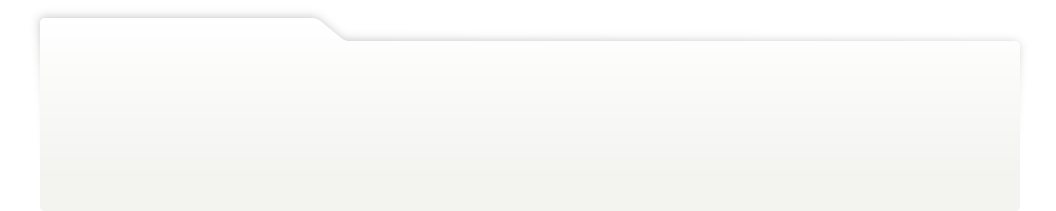
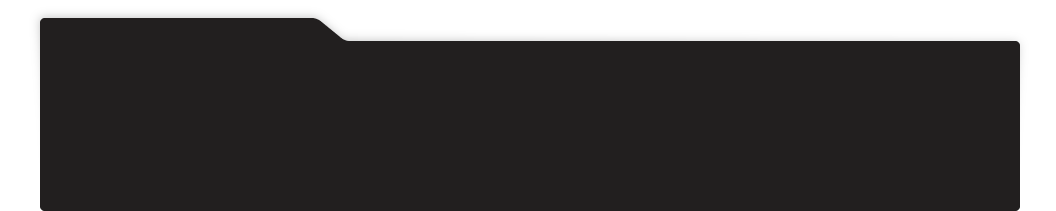
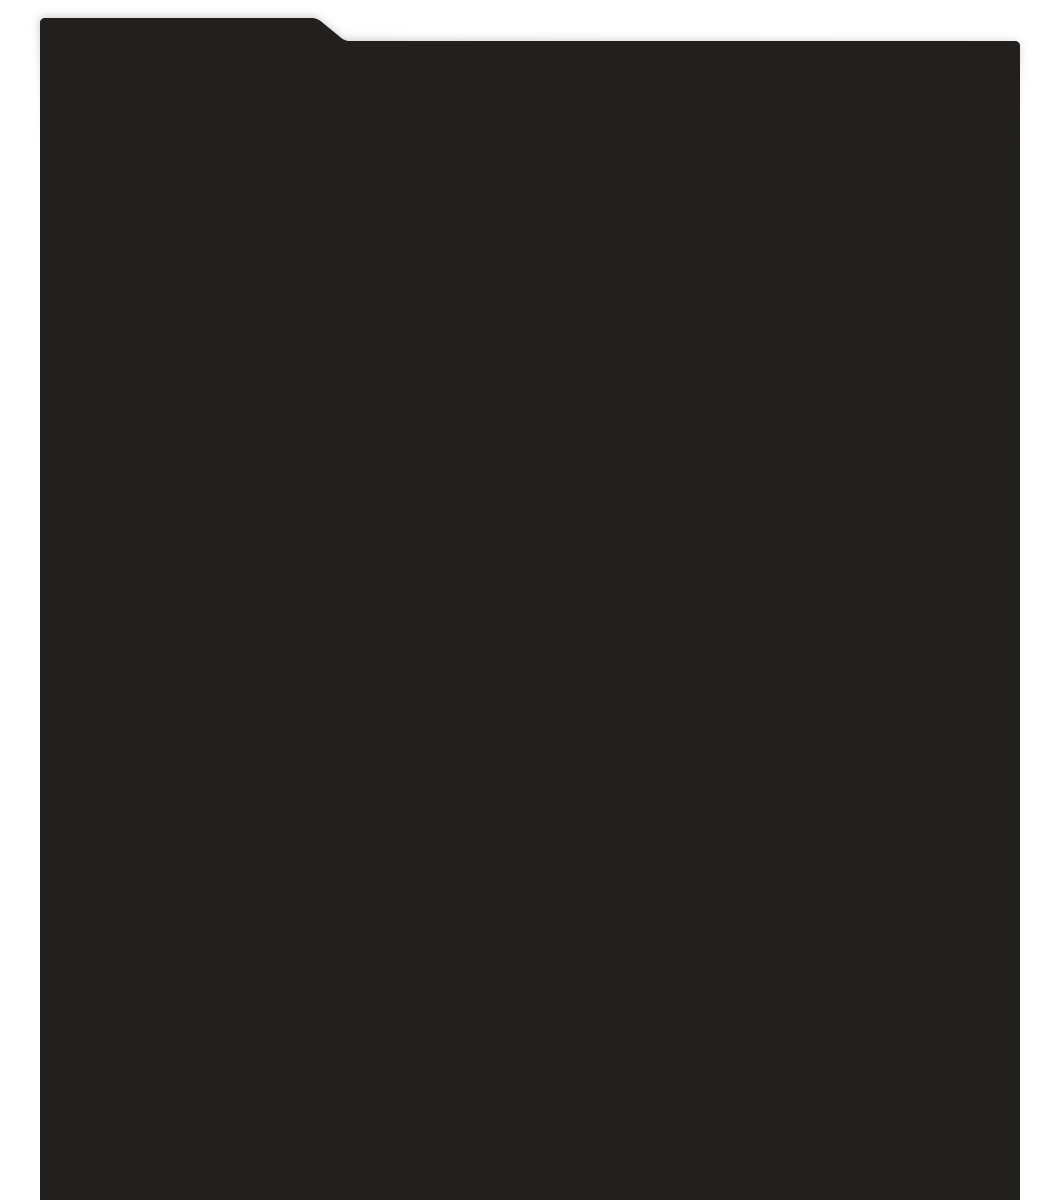
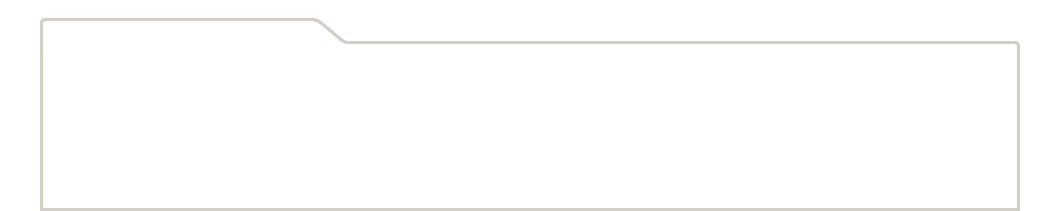
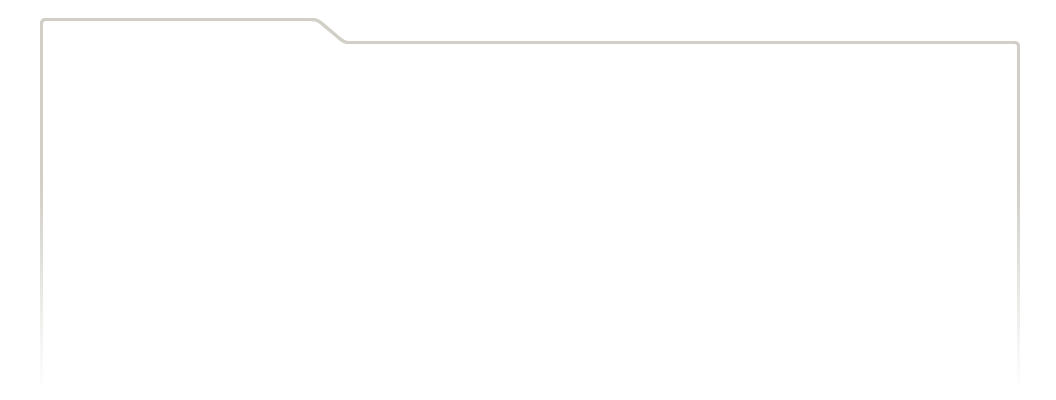
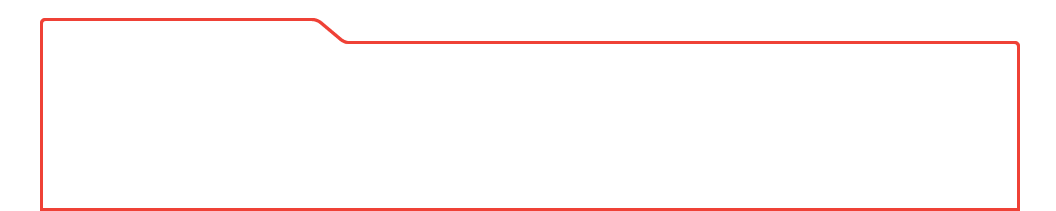
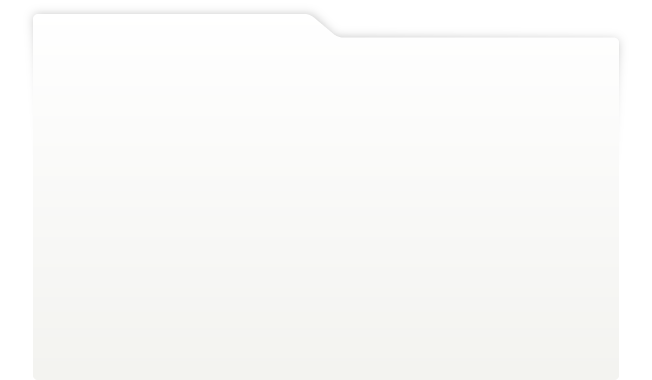
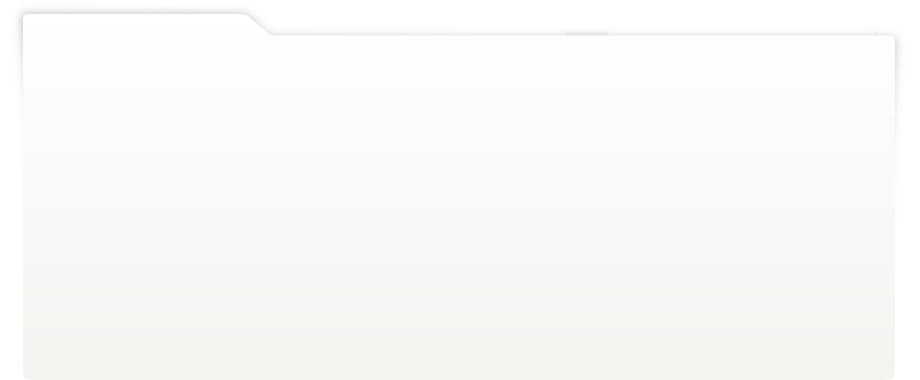
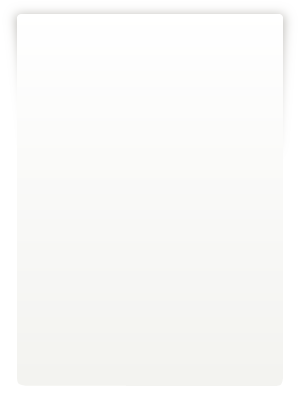
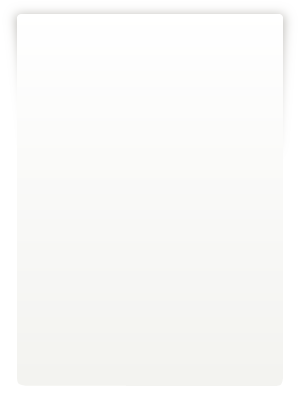
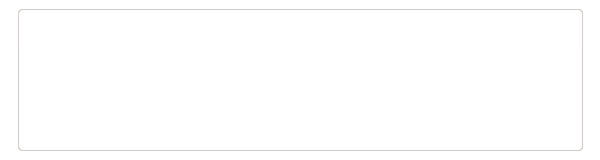
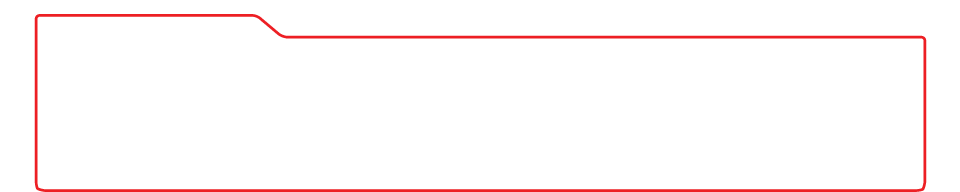
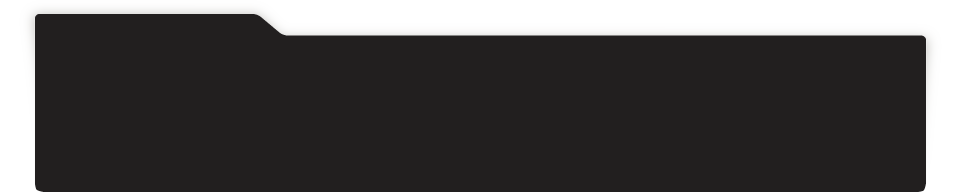
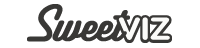
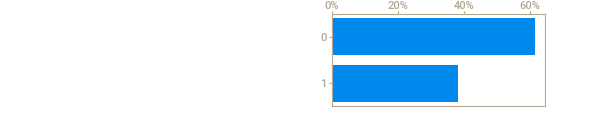
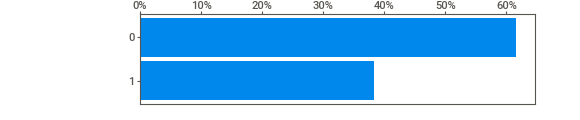
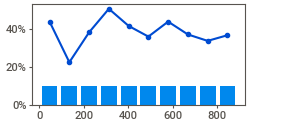
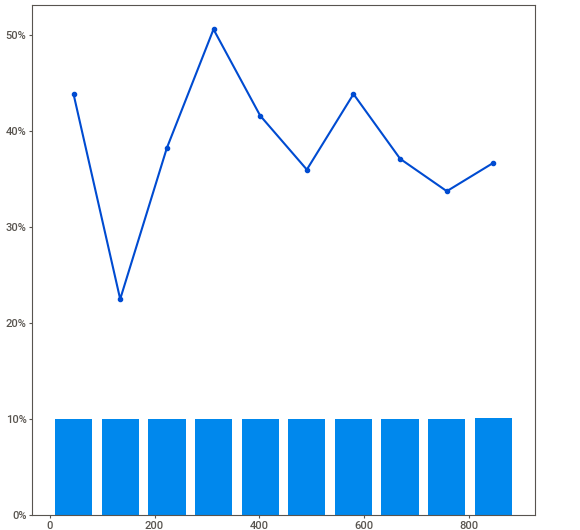
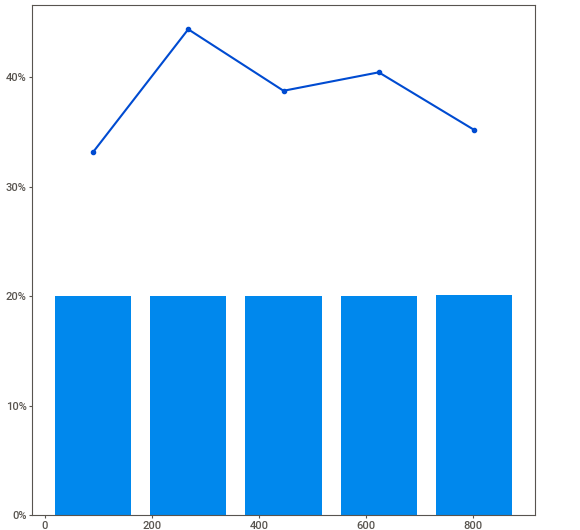
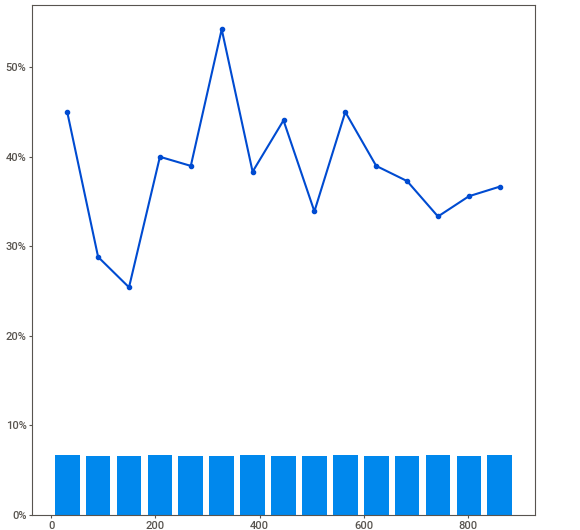
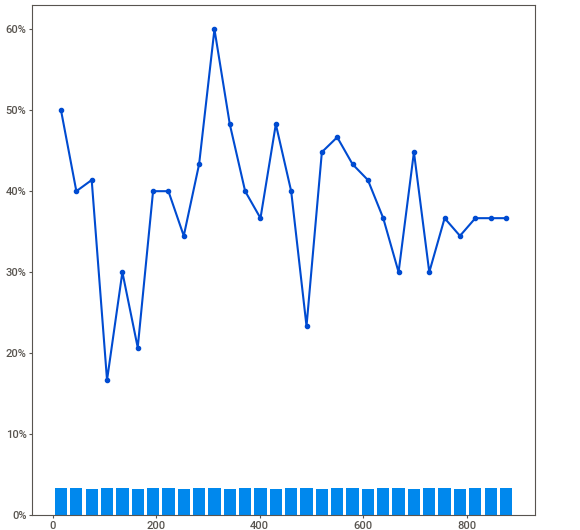
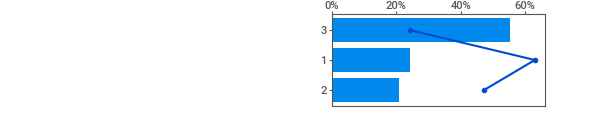
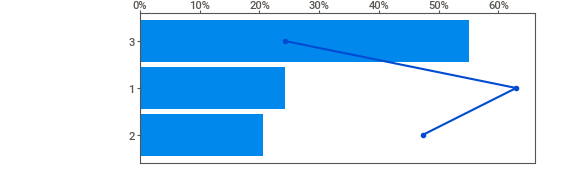
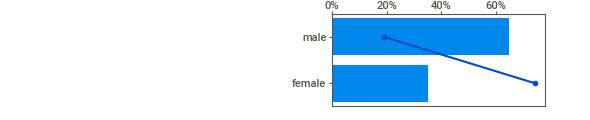
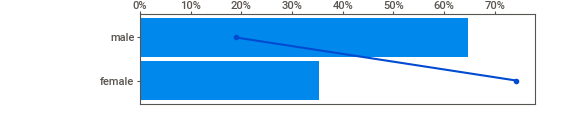
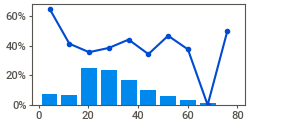
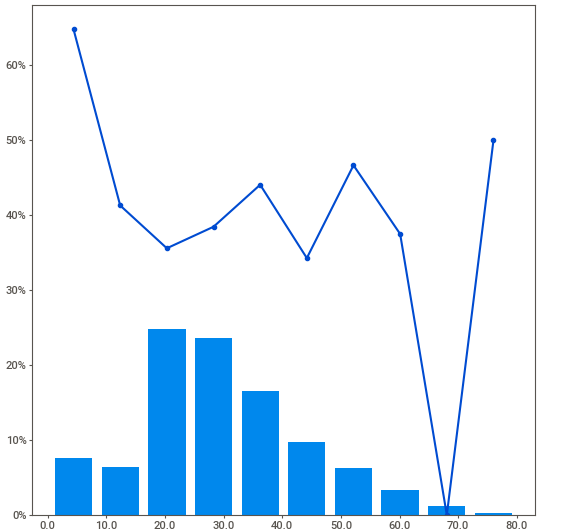
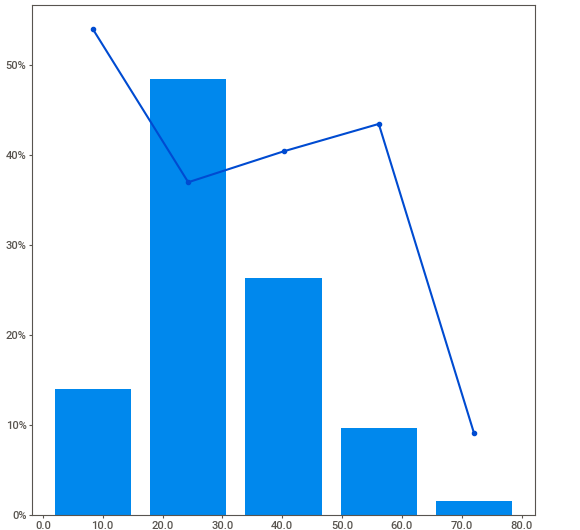
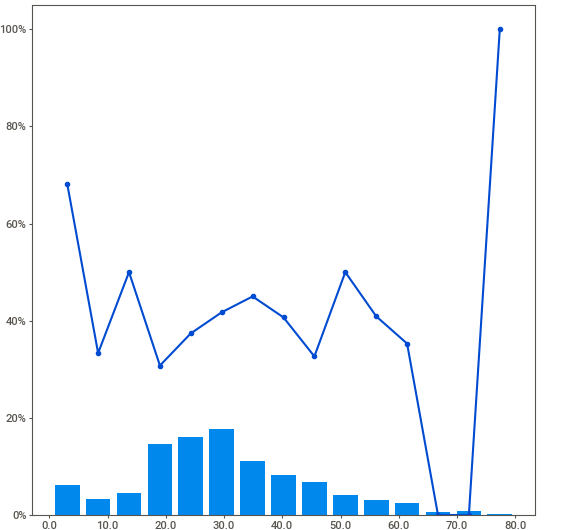
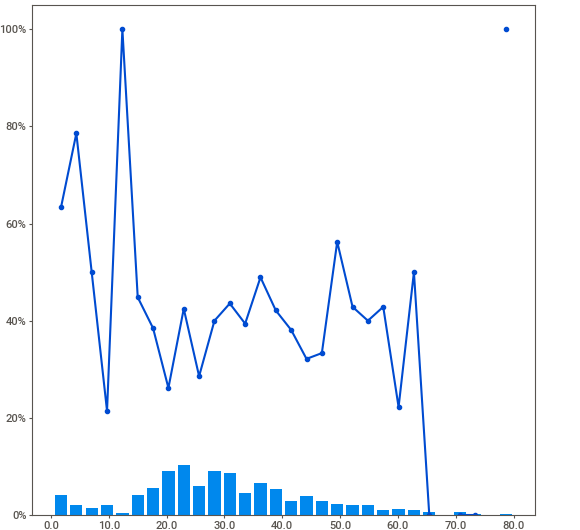
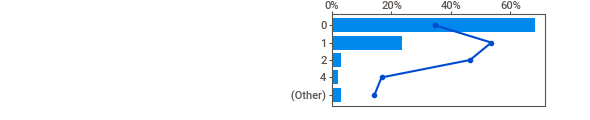
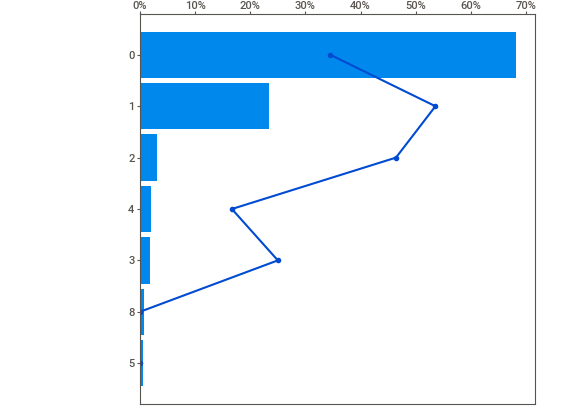
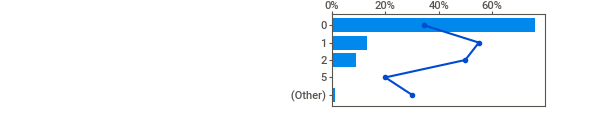
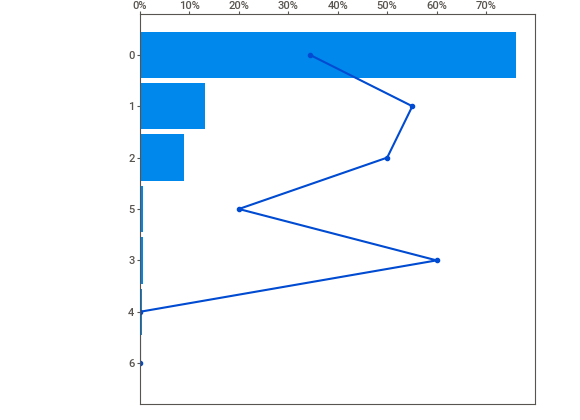
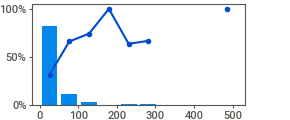
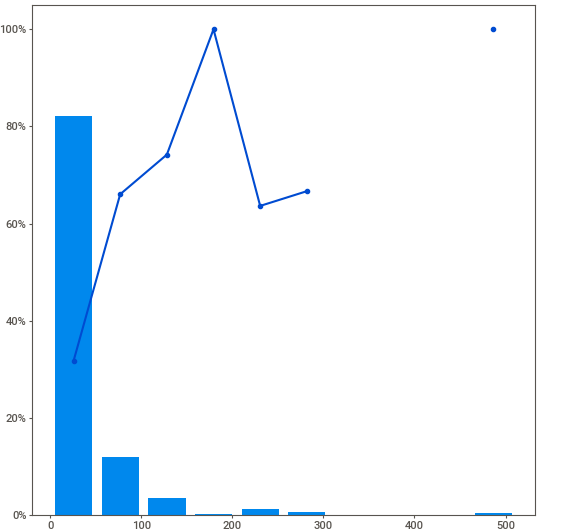
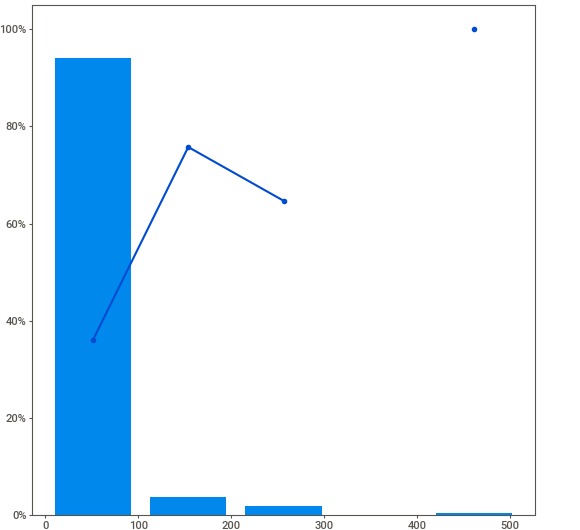
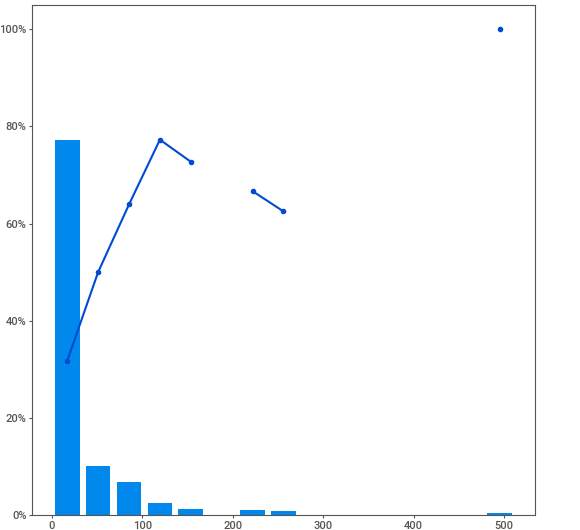
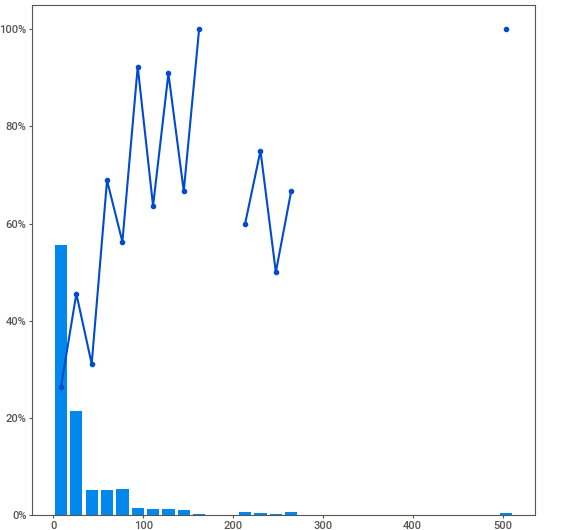
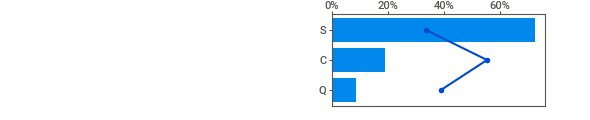
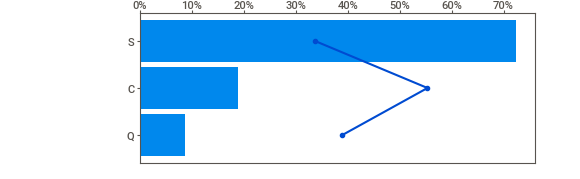
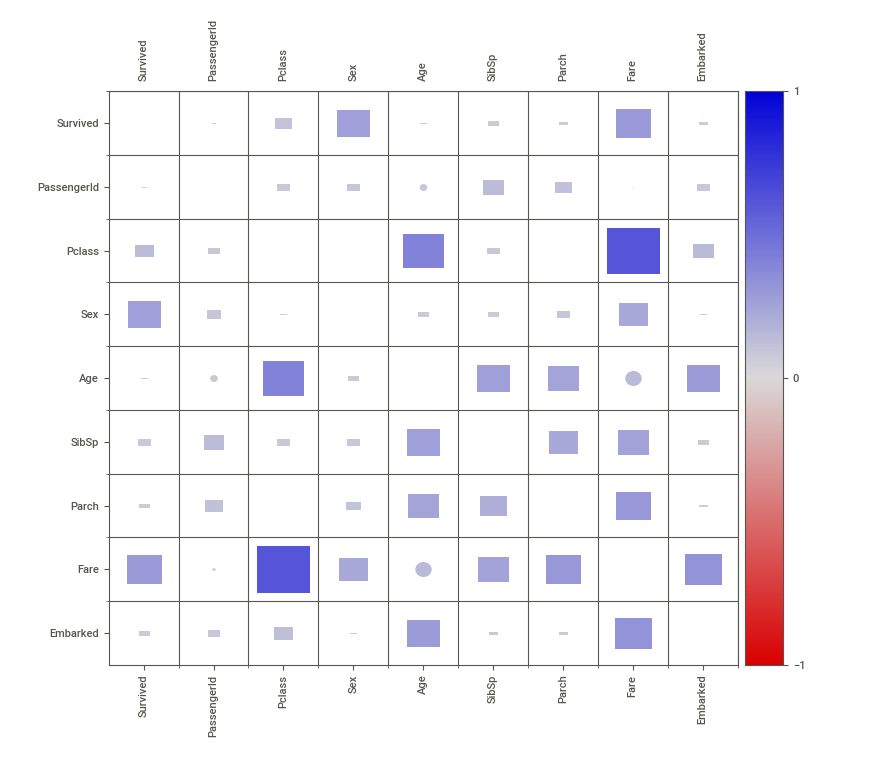
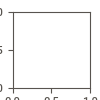

In [10]:
HTML(filename='/content/Report')

In [11]:
report_comapre =sweetviz.compare([train,'Train'],[test,'Test'],'Survived')

                                             |          | [  0%]   00:00 -> (? left)

In [79]:
report_comapre.show_html('Report_compare.html')

Report Report_compare.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



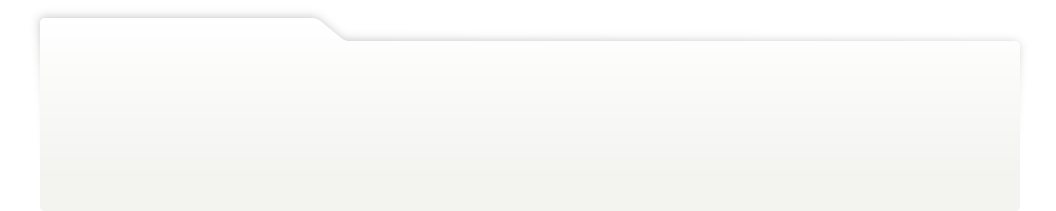
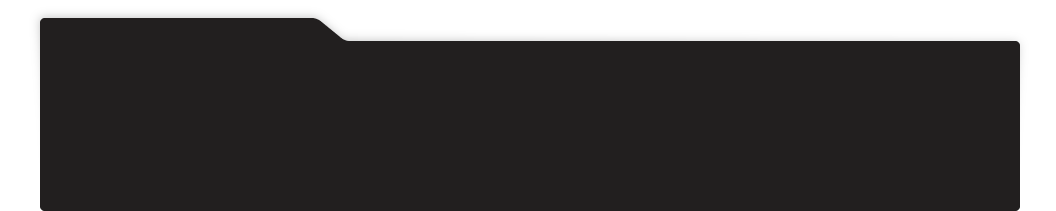
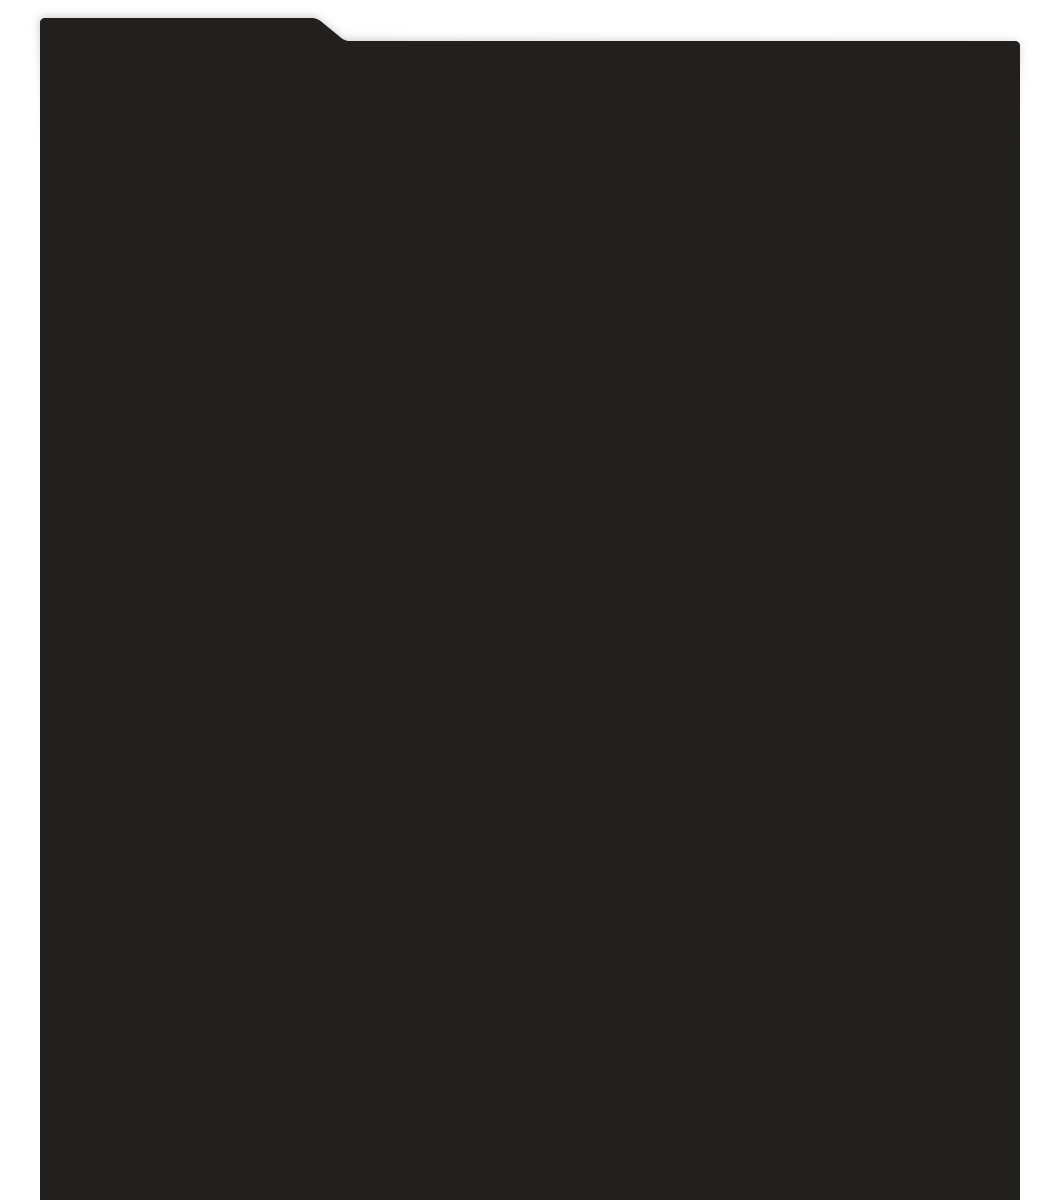
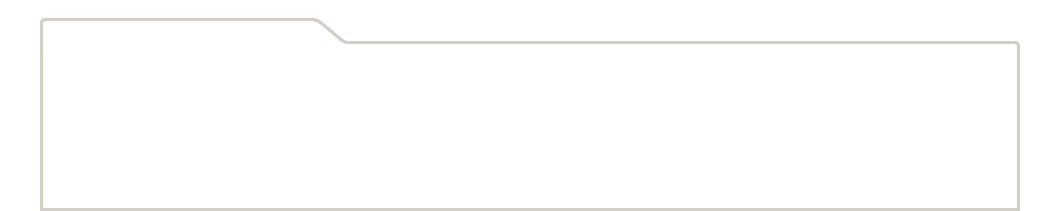
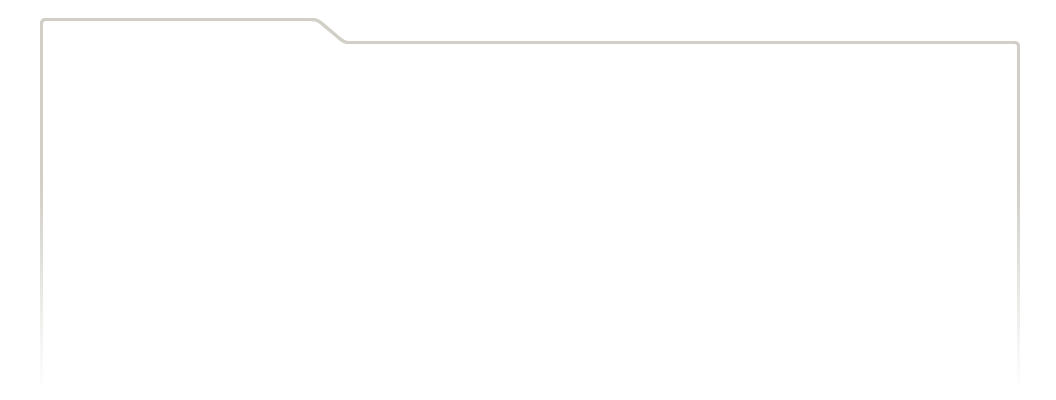
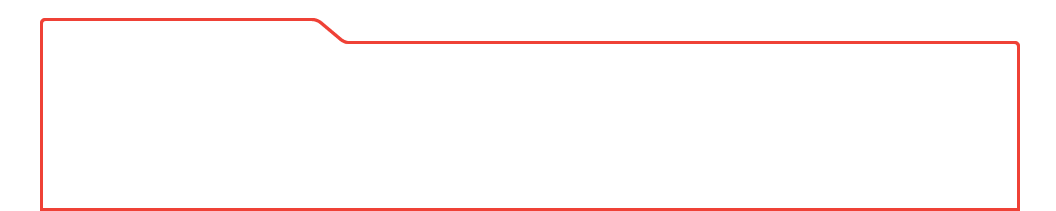
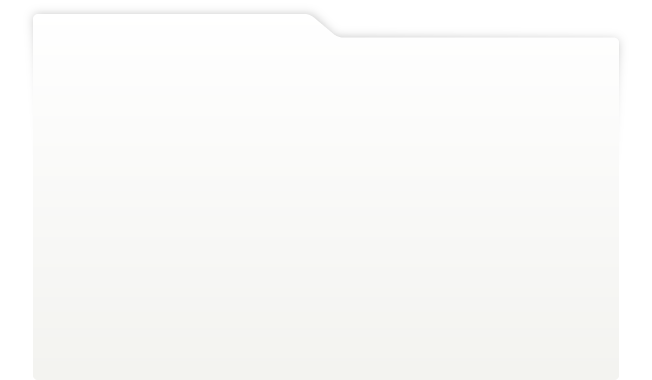
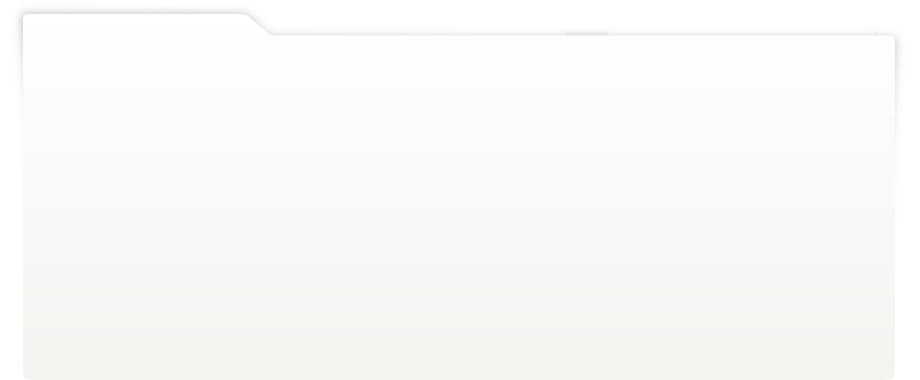
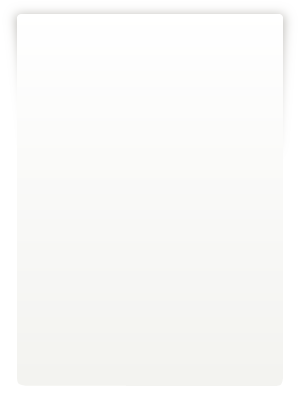
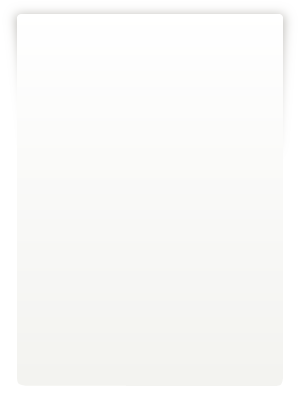
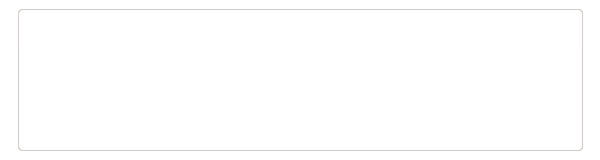
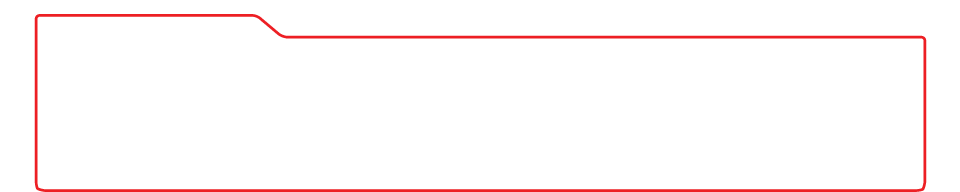
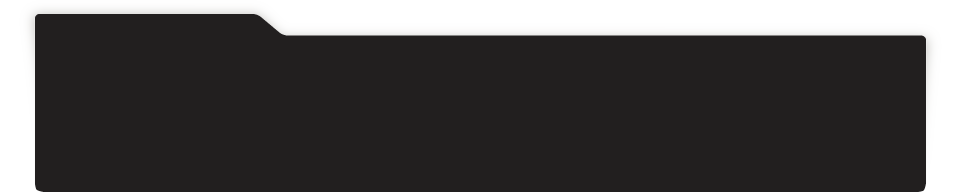
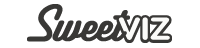
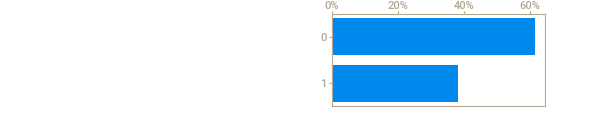
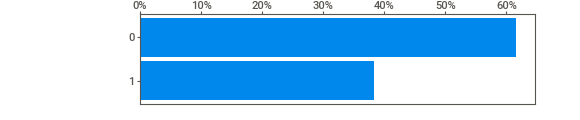
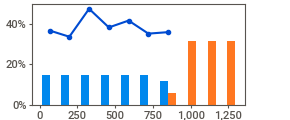
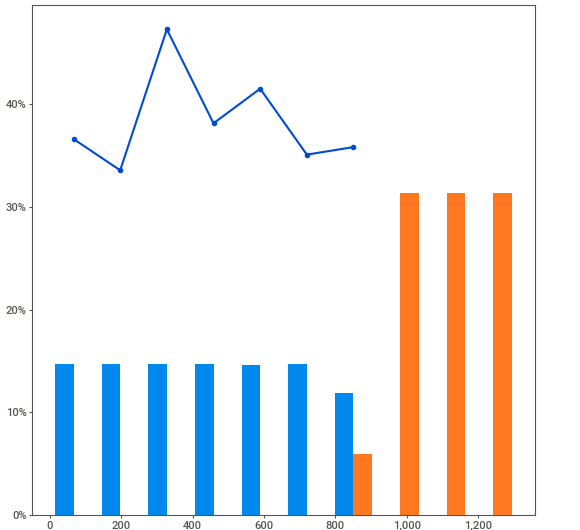
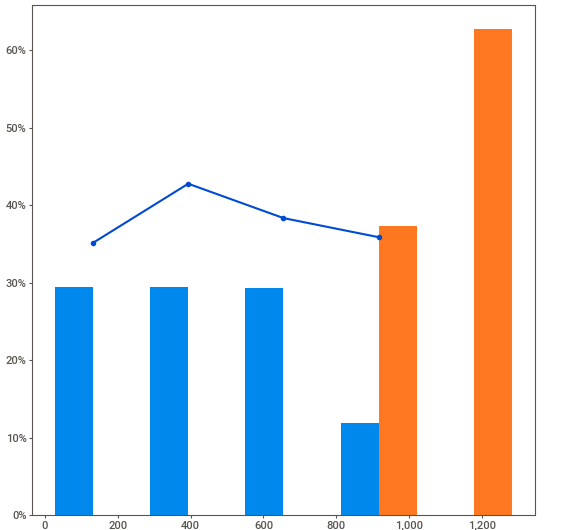
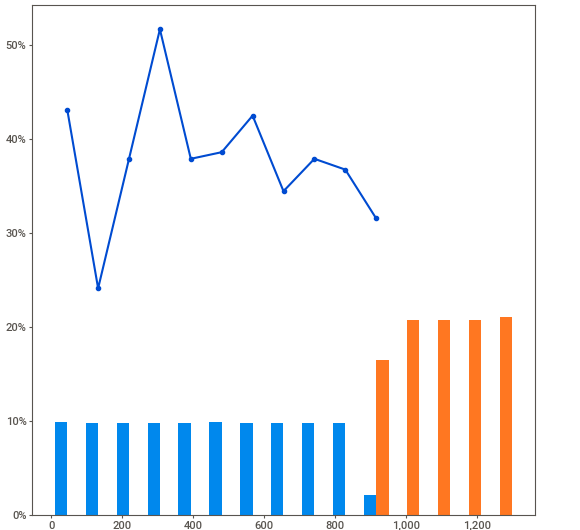
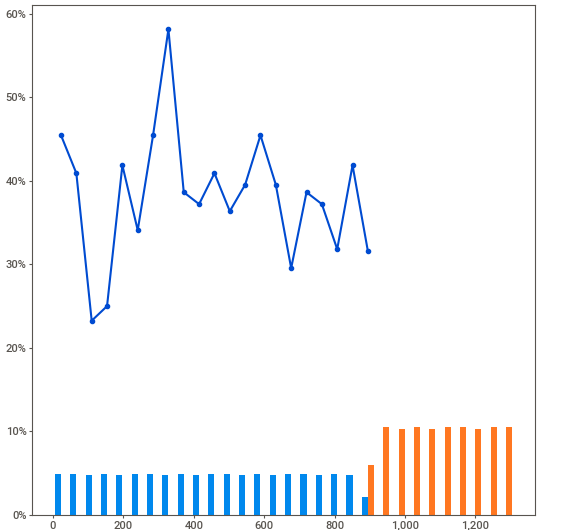
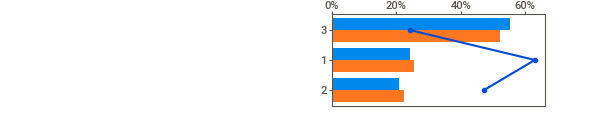
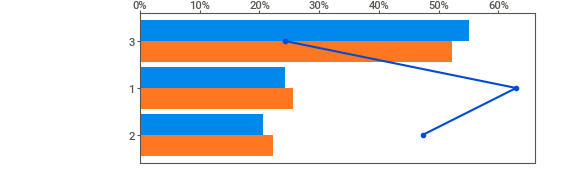
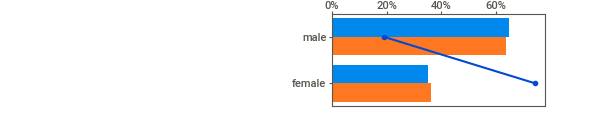
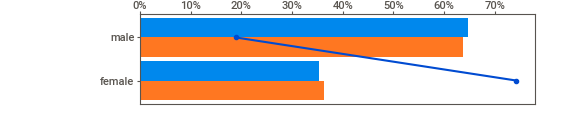
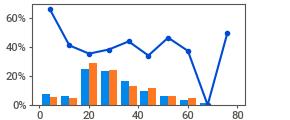
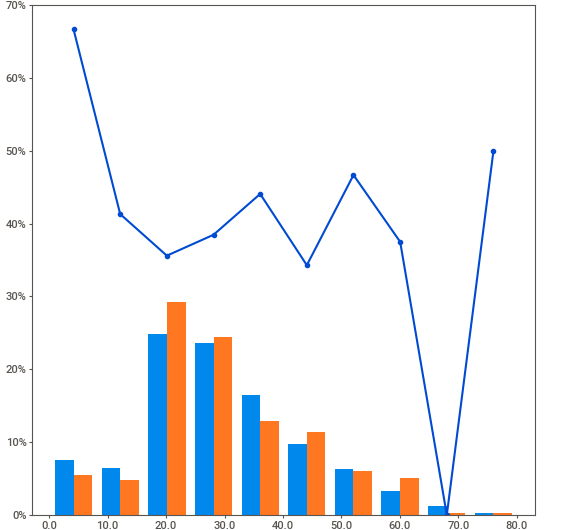
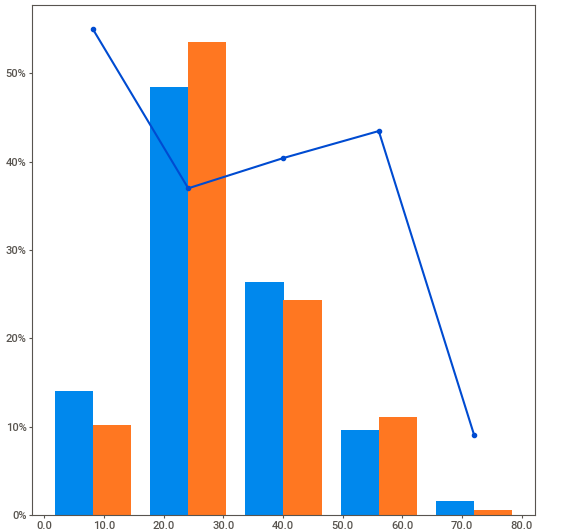
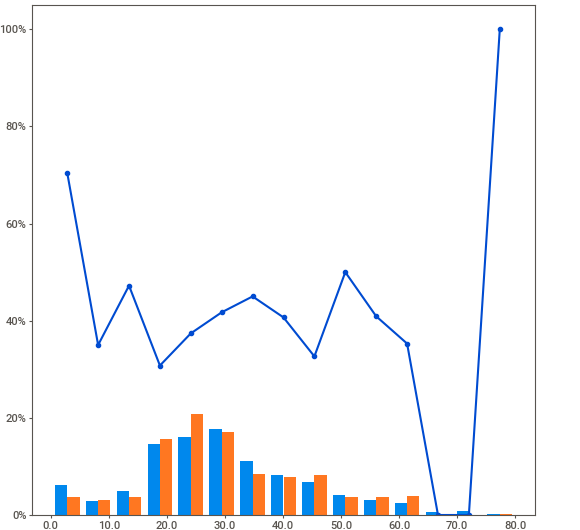
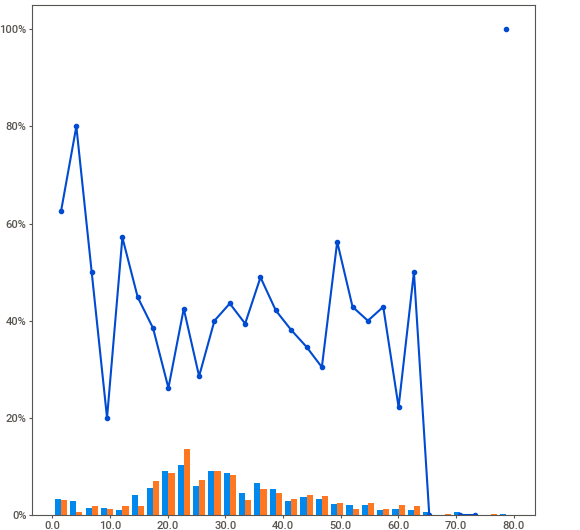
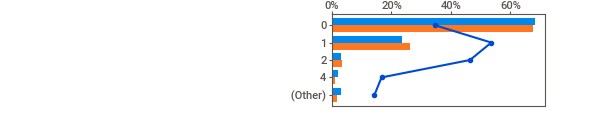
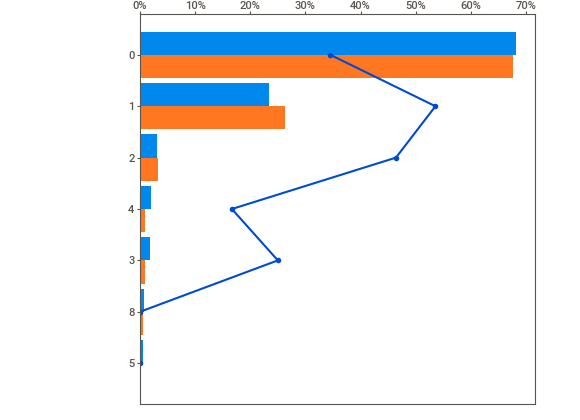
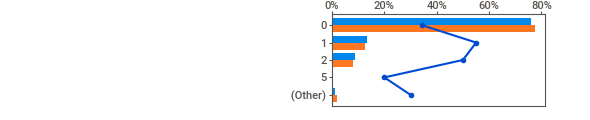
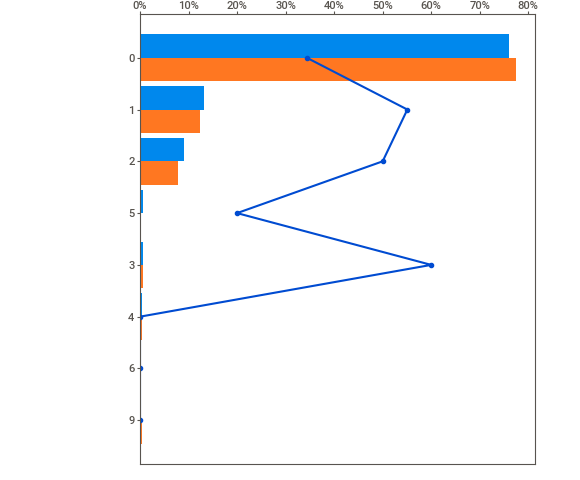
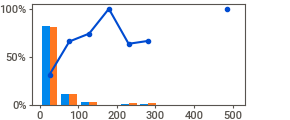
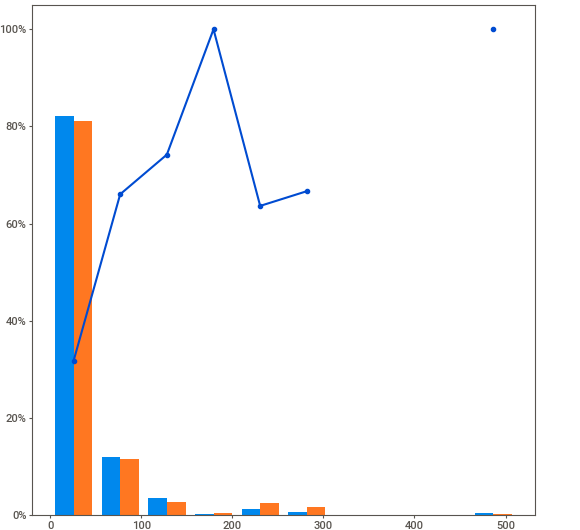
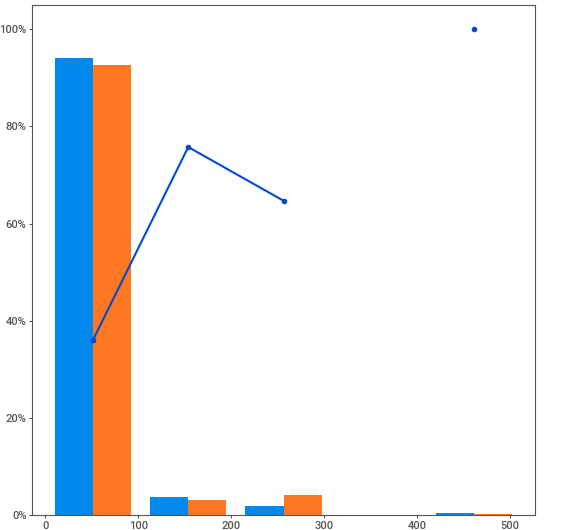
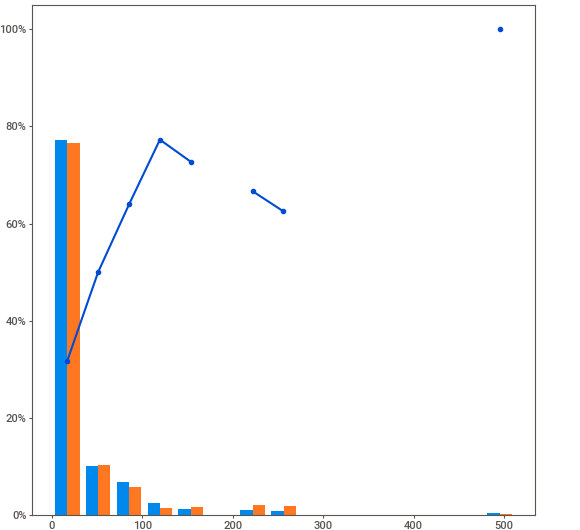
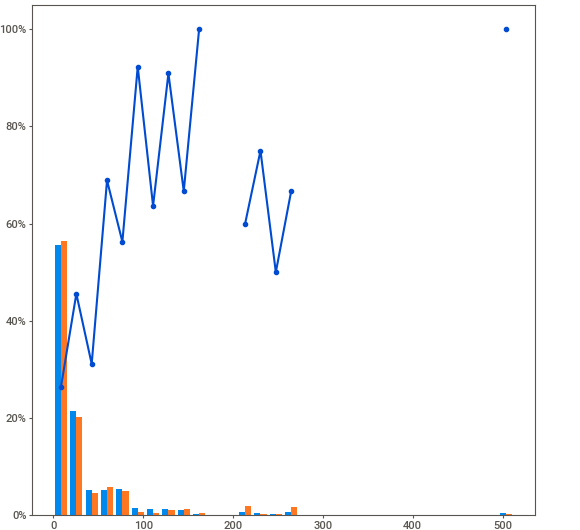
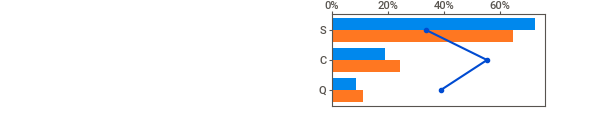
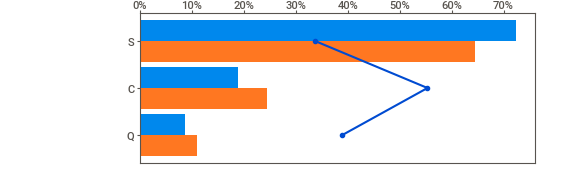
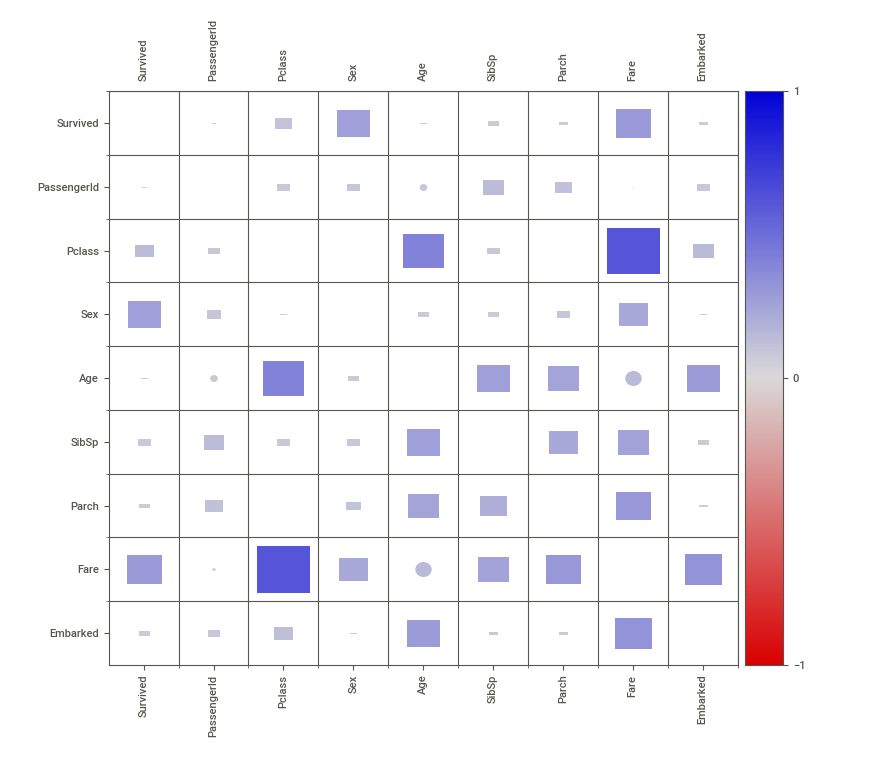
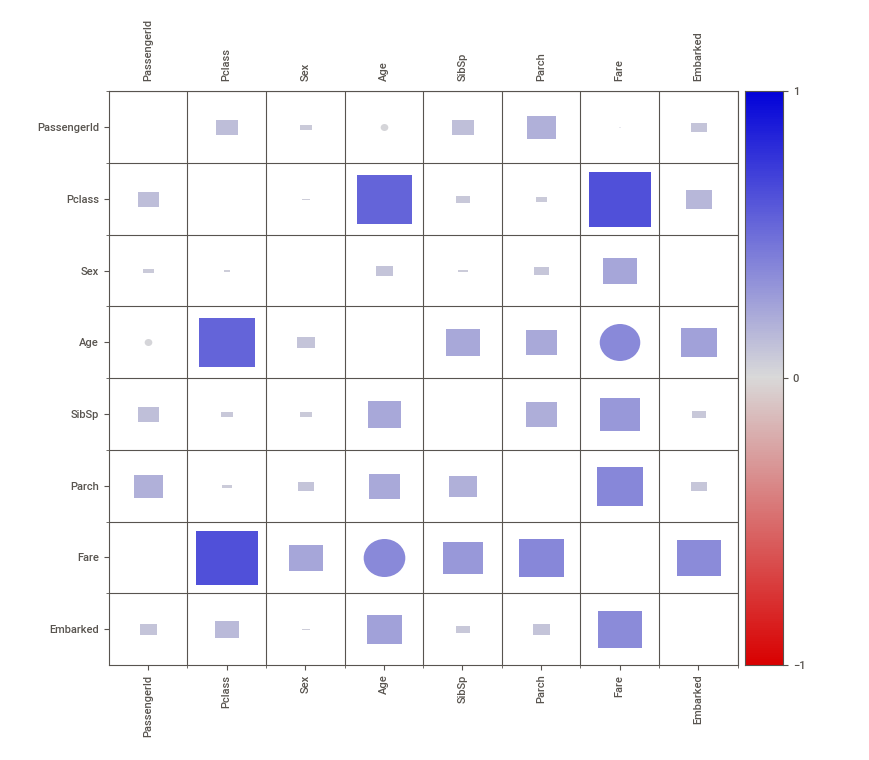

In [13]:
HTML(filename='/content/Report_compare')

In [14]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
print('Train_shape :',train.shape)
print('Test_shape',test.shape)

Train_shape : (891, 12)
Test_shape (418, 11)


In [17]:
print('Train_null_count\n',train.isnull().sum())
print('\nTest_null_count\n',test.isnull().sum())

Train_null_count
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test_null_count
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


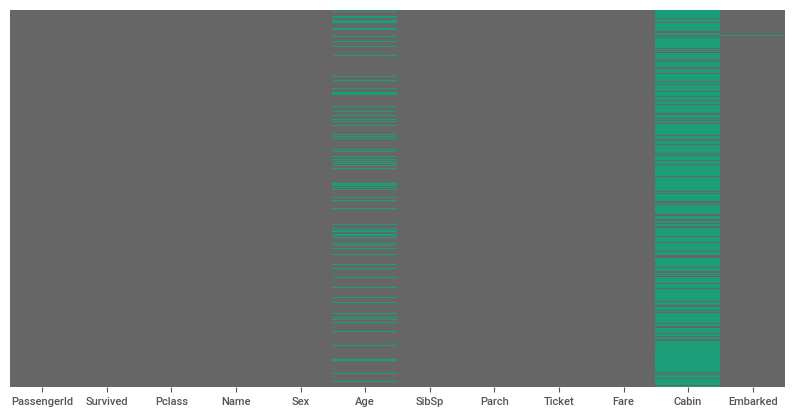

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='Dark2_r')

In [19]:
print("% null_values:",train.Age.isnull().sum()/train.Age.shape)
print("% null_values:",train.Cabin.isnull().sum()/train.Cabin.shape)

% null_values: [0.1986532]
% null_values: [0.77104377]


In [20]:
#drop all those columns which are not in use
train.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)
test_ID =test['PassengerId']
test.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [21]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [22]:
#handling the nan values
train['Age'].fillna(0,inplace=True)
train['Age']=train['Age'].astype(int)
train['Age'].replace(0,train['Age'].mean(),inplace=True)

In [23]:
train['Age'].dtype

dtype('float64')

In [24]:
train['Age']=train['Age'].astype(int)

In [25]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [26]:
test['Age'].fillna(0,inplace=True)
test['Age']=test['Age'].astype(int)
test['Age'].replace(0,test['Age'].mean(),inplace=True)
train['Age']=train['Age'].astype(int)

In [27]:
test['Age'].dtype

dtype('float64')

In [28]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [29]:
test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [30]:
test['Fare'].fillna(0,inplace=True)
test['Fare']=test['Fare'].astype(int)
test['Fare'].replace(0,test['Fare'].mean(),inplace=True)
train['Fare']=train['Fare'].astype(int)

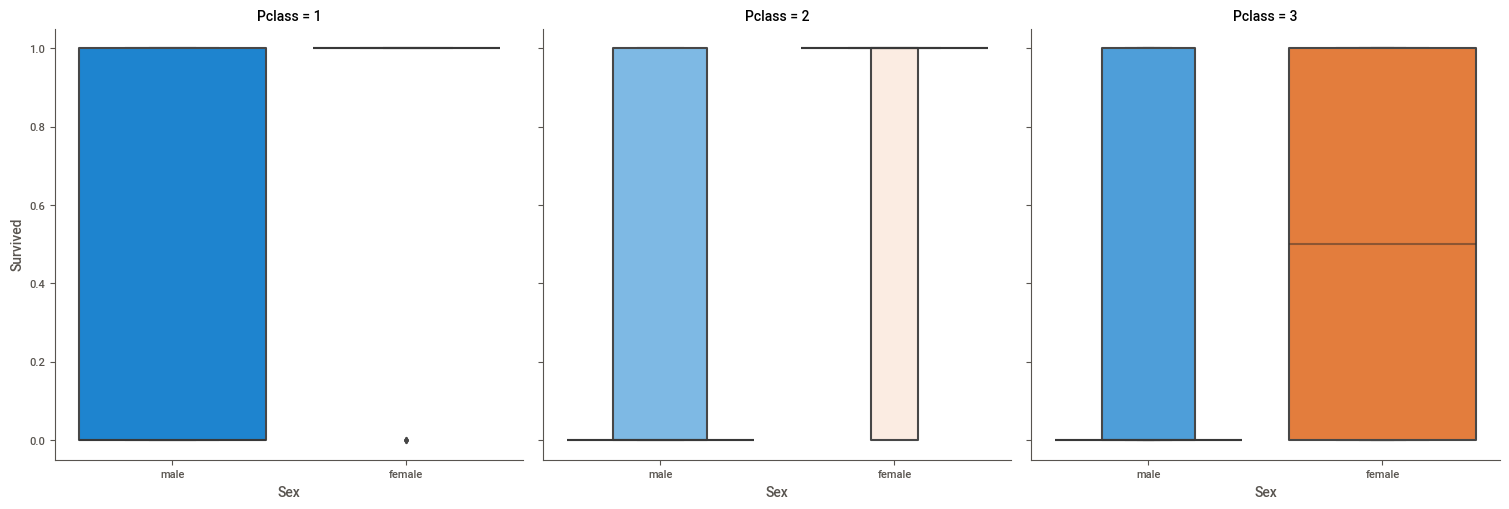

In [31]:
sns.catplot(x = 'Sex', y = 'Survived', data = train, kind = 'boxen', col = 'Pclass')

In [32]:
train.Embarked.isnull().sum()

2

In [33]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
train.Embarked.fillna(value='C',inplace=True)

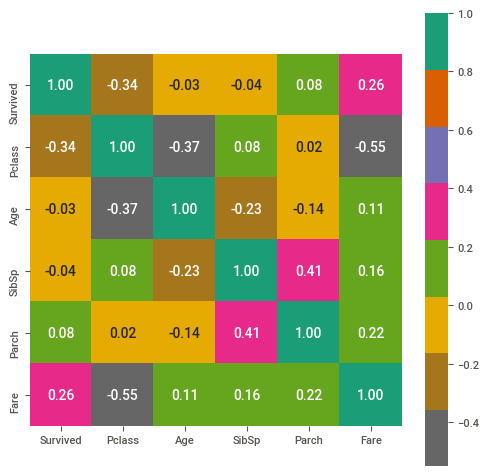

In [35]:
plt.figure(figsize=(6,6))
sns.heatmap(train.corr(),cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':10},cmap='Dark2_r')
sns.set_style('darkgrid')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


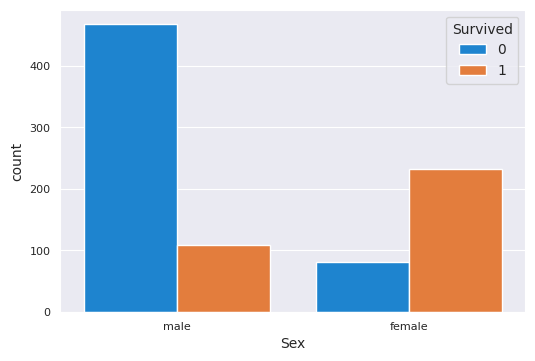

In [36]:
sns.countplot(train['Sex'],hue=train['Survived'])

In [37]:
#label_encoding
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
train['Sex'] =le.fit_transform(train['Sex'])
test['Sex'] =le.fit_transform(test['Sex'])
train['Embarked']=le.fit_transform(train['Embarked'])
test['Embarked'] =le.fit_transform(test['Embarked'])

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   Age       891 non-null    int64
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
 6   Fare      891 non-null    int64
 7   Embarked  891 non-null    int64
dtypes: int64(8)
memory usage: 55.8 KB


In [39]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7,2
1,1,1,0,38,1,0,71,0
2,1,3,0,26,0,0,7,2
3,1,1,0,35,1,0,53,2
4,0,3,1,35,0,0,8,2


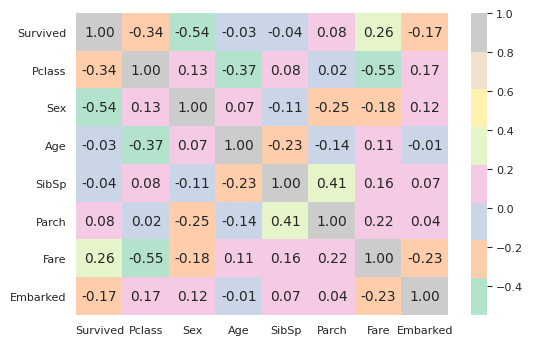

In [40]:
sns.heatmap(train.corr(),cbar=True,annot=True,annot_kws={'size':10},fmt='.2f',cmap='Pastel2')

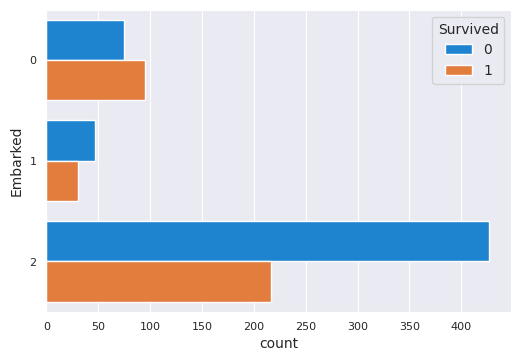

In [41]:
sns.countplot(y='Embarked',data=train,hue='Survived')

In [42]:
#independent and dependent
X=train.iloc[:,1:]
y=train.iloc[:,0]

In [43]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7,2
1,1,0,38,1,0,71,0
2,3,0,26,0,0,7,2
3,1,0,35,1,0,53,2
4,3,1,35,0,0,8,2


In [44]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    int64
 1   Sex       891 non-null    int64
 2   Age       891 non-null    int64
 3   SibSp     891 non-null    int64
 4   Parch     891 non-null    int64
 5   Fare      891 non-null    int64
 6   Embarked  891 non-null    int64
dtypes: int64(7)
memory usage: 48.9 KB


In [46]:
#scaling
from sklearn.preprocessing import StandardScaler
Scaler =StandardScaler()
X_scale =Scaler.fit_transform(X)

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X_scale,y,test_size=0.3,random_state=4)

In [48]:
print('Shape_X_train',X_train.shape)
print('Shape_X_test',X_test.shape)
print('Shape_y_train',y_train.shape)
print('Shape_y_test',y_test.shape)

Shape_X_train (623, 7)
Shape_X_test (268, 7)
Shape_y_train (623,)
Shape_y_test (268,)


In [49]:
y_test.value_counts()

0    178
1     90
Name: Survived, dtype: int64

In [50]:
#balancing the data set
from imblearn.over_sampling import  RandomOverSampler
sampler =RandomOverSampler()
X_bal,y_bal =sampler.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import xgboost 
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold ,StratifiedKFold
from sklearn import metrics
from sklearn.pipeline import Pipeline

In [52]:
pipe_LR=Pipeline([('scaler1',StandardScaler()),
                 ('LR',LogisticRegression(random_state=2))])
pipe_Ada=Pipeline([('scaler2',StandardScaler()),
                    ('Ada',AdaBoostClassifier(learning_rate=0.1,random_state=2))])
pipe_DT=Pipeline([('scaler3',StandardScaler()),
                  ('DTR',DecisionTreeClassifier())])
pipe_RF=Pipeline([('scaler4',StandardScaler()),
                  ('RFR',RandomForestClassifier())])
pipe_Knn=Pipeline([('scaler5',StandardScaler()),
                   ('Knn',KNeighborsClassifier())])
pipe_Xgb =Pipeline([('scaler5',StandardScaler()),
                   ('Xgboost',XGBClassifier(learning_rate=0.1,random_state=5))])

In [53]:
pipeline=[pipe_LR,pipe_Ada,pipe_DT,pipe_RF,pipe_Knn,pipe_Xgb]

In [54]:
pipe_dict ={0:'Lr',1:'Ada',2:'DT',3:'RF',4:'Knn',5:'Xgb'}

In [55]:
for pipe in pipeline:
  pipe.fit(X_bal,y_bal)

In [56]:
for i,models in enumerate(pipeline):
  print("{} Accuracy : {}".format(pipe_dict[i],models.score(X_test,y_test)))

Lr Accuracy : 0.8134328358208955
Ada Accuracy : 0.7798507462686567
DT Accuracy : 0.8134328358208955
RF Accuracy : 0.8283582089552238
Knn Accuracy : 0.8283582089552238
Xgb Accuracy : 0.835820895522388


In [57]:
#hypertune Xgb

In [58]:
model =XGBClassifier()

In [59]:
sorted(model.get_xgb_params())

['base_score',
 'booster',
 'colsample_bylevel',
 'colsample_bynode',
 'colsample_bytree',
 'gamma',
 'learning_rate',
 'max_delta_step',
 'max_depth',
 'min_child_weight',
 'missing',
 'n_estimators',
 'nthread',
 'objective',
 'reg_alpha',
 'reg_lambda',
 'scale_pos_weight',
 'seed',
 'subsample',
 'verbosity']

In [60]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [61]:
fold =StratifiedKFold(n_splits=5,shuffle=True,random_state=5)

In [62]:
rm_c =RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=5,n_jobs=-1,cv=fold,random_state=5)

In [63]:
rm_c.fit(X_bal,y_bal)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binar...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_

In [64]:
rm_c.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.0,
 'learning_rate': 0.3,
 'max_depth': 4,
 'min_child_weight': 5}

In [65]:
best =rm_c.best_estimator_
best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [66]:
model =XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3,
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [67]:
model.fit(X_bal,y_bal)
y_pred =model.predict(X_test)

In [68]:
print('Accuracy_Score :',metrics.accuracy_score(y_test,y_pred))

Accuracy_Score : 0.832089552238806


In [69]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.0,0,0,7.0,1
1,3,0,47.0,1,0,7.0,2
2,2,1,62.0,0,0,9.0,1
3,3,1,27.0,0,0,8.0,2
4,3,0,22.0,1,1,12.0,2


In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [71]:
test = Scaler.fit_transform(test)

In [72]:
y_pred=model.predict(test)

In [73]:
sample =pd.read_excel('/content/titanic_to_submit.xlsx')

In [74]:
sample.head()

,Price
0,373.548279
1,912.238464
2,350.007782
3,898.446228
4,296.466187


In [76]:
Submit =pd.DataFrame({'ID':test_ID,'Survived':y_pred})

In [77]:
Submit.to_csv('Submission.csv')